In [2]:
# installing kaggle library
!pip install kaggle

In [3]:
#importing needed libraries
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
#import your file kaggle.json
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp /kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


**API to fetch dataset from kaggle**




In [5]:
!kaggle datasets download -d dhoogla/cicddos2019 #downloading our dataset in zip format

 59% 17.0M/28.7M [00:00<00:00, 41.1MB/s]
100% 28.7M/28.7M [00:00<00:00, 60.0MB/s]


In [6]:
from zipfile import ZipFile #extacting our zip file
datasetddos = '/content/cicddos2019.zip'
with ZipFile(datasetddos,'r') as zip :
  zip.extractall()
  print("the dataset is extracted")

the dataset is extracted


In [7]:
#trying to gather all in one parquet file
#1-putting every parquet file into a dataframe
#2-making a list which will hold our dataframes
#3-concatinate the list using pandas function concat()
#4-converting the concatinated dataframe to parquet file .
df1 = pd.read_parquet('/content/DNS-testing.parquet')
df2 = pd.read_parquet('/content/LDAP-testing.parquet')
df3 = pd.read_parquet('/content/LDAP-training.parquet')
df4 = pd.read_parquet('/content/MSSQL-testing.parquet')
df5 = pd.read_parquet('/content/MSSQL-training.parquet')
df6 = pd.read_parquet('/content/NTP-testing.parquet')
df7 = pd.read_parquet('/content/NetBIOS-testing.parquet')
df8 = pd.read_parquet('/content/NetBIOS-training.parquet')
df9 = pd.read_parquet('/content/Portmap-training.parquet')
df10 = pd.read_parquet('/content/SNMP-testing.parquet')
df11 = pd.read_parquet('/content/Syn-testing.parquet')
df12 = pd.read_parquet('/content/Syn-training.parquet')
df13 = pd.read_parquet('/content/TFTP-testing.parquet')
df14 = pd.read_parquet('/content/UDP-testing.parquet')
df15 = pd.read_parquet('/content/UDP-training.parquet')
df16 = pd.read_parquet('/content/UDPLag-testing.parquet')
df17 = pd.read_parquet('/content/UDPLag-training.parquet')
dfs = []
dfs.append(df1)
dfs.append(df2)
dfs.append(df3)
dfs.append(df4)
dfs.append(df5)
dfs.append(df6)
dfs.append(df7)
dfs.append(df8)
dfs.append(df9)
dfs.append(df10)
dfs.append(df11)
dfs.append(df12)
dfs.append(df13)
dfs.append(df14)
dfs.append(df15)
dfs.append(df16)
dfs.append(df17)
concatenated_df = pd.concat(dfs, ignore_index=True)
output_file = "/content/finaldataset.parquet"
concatenated_df.to_parquet(output_file, engine='pyarrow')





In [8]:
dfp = pd.read_parquet('/content/finaldataset.parquet') #putting all parquet files into one dataframe
dfp.head()
dfp['Label'].value_counts()

DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: Label, dtype: int64

as we see we put all the parquets into one parquet dataframe in order to facilitate the preprocessing .

In [9]:
#now let's convert from finaldataset.parquet into finaldataset.csv
csv_file = "/content/finaldataset.csv"
dfp.to_csv(csv_file, index=False)


In [10]:
#let's check our finaldataset.csv that we are going to use .
ddosdataset = pd.read_csv('/content/finaldataset.csv')
ddosdataset.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
2,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
4,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS


In [11]:
 ddosdataset['Label'].value_counts()

DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: Label, dtype: int64

now finaldataset is ready to be preprocessed .

**1-Handling the missing values in our dataset:**

---



to handle missing values in your dataset there are two methods:

1) dropping

2) imputation





In [12]:
# let's check if our dataset has any missing values .
missing_counts = ddosdataset.isnull().sum()
print(missing_counts.head(78))


Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
                           ..
Idle Mean                   0
Idle Std                    0
Idle Max                    0
Idle Min                    0
Label                       0
Length: 78, dtype: int64


as we see our dataset has not any missing values.

**In case you found missing values:**

this is how you will deal with them --->

1) **imputation**:

you will analyse the data distribution in the coulmn who has missing values , then by analysing you will chose one of the central tendencies which are:

1-mean()

2-median()

3-mode()

**Exemple:**

this is how to analyse data distribution in specific coulmn which contains missing values(of course you need to import the needed libraries firstly):


fig ,ax = plt.subplots(figsize=(8,8))

sns.distplot(ddosdataset.columnnamewhichcontainsmissingvalues)

**sns---> seaborn library**

if data is gathered in one place , we will use Median to handle missing values.

**and this is how to do it:**

ddosdataset['columnwhichcontainsmissingvalues'].fillna(ddosdataset['columnwhichcontainsmissingvalues'].median(),inplace=True)

**Now if you check for missing values in this column you will find nothing**



2) **Dropping**:

here you will just dropp out all the missing values (**Note**:if your dataset is small then this method it's not a good solution )

**This is how to do it:**

**ddosdataset = ddosdataset.dropna(how='any')**

You will notice that the number of rows will be decreased.

**seperating data features and target(Label)**

In [13]:
X = ddosdataset.drop(columns='Label', axis =1)
Y = ddosdataset['Label']

In [14]:
print(X)

        Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             17             48                  2                       0   
1             17              2                  2                       0   
2             17              1                  2                       0   
3             17              1                  2                       0   
4             17              1                  2                       0   
...          ...            ...                ...                     ...   
431366         6             53                  1                       2   
431367         6             66                  1                       2   
431368        17          26288                  2                       2   
431369         6          30679                  1                       1   
431370         6             67                  1                       2   

        Fwd Packets Length Total  Bwd Packets Length Total  \
0

In [15]:
print(Y)

0         DrDoS_DNS
1         DrDoS_DNS
2         DrDoS_DNS
3         DrDoS_DNS
4         DrDoS_DNS
            ...    
431366       Benign
431367       Benign
431368       Benign
431369       Benign
431370       Benign
Name: Label, Length: 431371, dtype: object


**So this is our Label that we are going to use in order to say it's a ddos attack or not**

Notice that this label contains non-numerical values which is not good for training our model that's why we should call label encoding concept.

**#### Label encoding is converting the labels into numeric form #####**.

**i will give the number 1 to all ddos attacks and number 0 to Benign**

**1------> DDOS Attack (dosn't matter it's type )**

0------> Benign (normal)

In [16]:
list(Y)

['DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDoS_DNS',
 'DrDo

In [17]:
#this loop will replace our label by numerical values ,if it's benign ,we will give 0 else we give it 1.
for i in range(len(Y)):
    if Y[i] == "Benign":
        Y[i] = 0
    else:
        Y[i] = 1

<ipython-input-17-50bb82cb8ca7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[i] = 1
<ipython-input-17-50bb82cb8ca7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[i] = 0


In [18]:
print(Y)

0         1
1         1
2         1
3         1
4         1
         ..
431366    0
431367    0
431368    0
431369    0
431370    0
Name: Label, Length: 431371, dtype: object


**Handling imbalanced data**

In [19]:
ddosdataset.tail()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
431366,6,53,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431367,6,66,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431368,17,26288,2,2,96.0,96.0,48.0,48.0,48.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431369,6,30679,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
431370,6,67,1,2,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
benign = ddosdataset[ddosdataset.Label == 0]
ddos= ddosdataset[ddosdataset.Label ==1]

In [21]:
print(benign.shape)
print(ddos.shape)

(97831, 78)
(333540, 78)


In [22]:

ddos_sample = ddos.sample(n=97831)
print(ddos_sample.shape)


(97831, 78)


In [23]:
newddos_dataset = pd.concat([ddos_sample, benign] , axis= 0)

In [24]:
newddos_dataset.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
145846,17,7842,30,0,13200.0,0.0,440.0,440.0,440.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
312484,17,5997182,6,0,3096.0,0.0,516.0,516.0,516.0,0.000000,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
389107,17,104192,4,0,1398.0,0.0,369.0,330.0,349.5,22.516660,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
328657,17,6002720,6,0,3096.0,0.0,516.0,516.0,516.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39981,17,251,64,0,27584.0,0.0,440.0,152.0,431.0,50.506012,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [25]:
newddos_dataset['Label'].value_counts()

1    97831
0    97831
Name: Label, dtype: int64

**the data now is balanced**

saving this dataset

In [26]:
df2 = pd.DataFrame(newddos_dataset)
df2.to_csv('ddosdatasetwhitoutstd.csv', index=False)


**Data** **Standardization**:

**Data Standardization** is the process of standardizing the data to common format and common range.

In [27]:
dataframe = pd.read_csv('/content/ddosdatasetwhitoutstd.csv')

In [28]:
dataframe['Label'].value_counts()
dataframe.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,7842,30,0,13200.0,0.0,440.0,440.0,440.0,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,17,5997182,6,0,3096.0,0.0,516.0,516.0,516.0,0.000000,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,17,104192,4,0,1398.0,0.0,369.0,330.0,349.5,22.516660,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,17,6002720,6,0,3096.0,0.0,516.0,516.0,516.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,17,251,64,0,27584.0,0.0,440.0,152.0,431.0,50.506012,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [29]:
XF = dataframe.drop(columns='Label', axis =1)
YF = dataframe['Label']

In [30]:
scaler = StandardScaler()

In [31]:
standardized_data = scaler.fit_transform(XF)

In [32]:
print(standardized_data)

[[ 0.81484319 -0.37180179  0.05431952 ... -0.19451033 -0.31276535
  -0.27435209]
 [ 0.81484319 -0.13876444 -0.06191329 ... -0.19451033 -0.31276535
  -0.27435209]
 [ 0.81484319 -0.36805294 -0.07159936 ... -0.19451033 -0.31276535
  -0.27435209]
 ...
 [ 0.81484319 -0.37108408 -0.08128543 ... -0.19451033 -0.31276535
  -0.27435209]
 [-1.19067365 -0.37091323 -0.08612846 ... -0.19451033 -0.31276535
  -0.27435209]
 [-1.19067365 -0.37210431 -0.08612846 ... -0.19451033 -0.31276535
  -0.27435209]]


In [33]:
XF = standardized_data

In [34]:
print(XF.shape)

(195662, 77)


In [35]:
print(YF)

0         1
1         1
2         1
3         1
4         1
         ..
195657    0
195658    0
195659    0
195660    0
195661    0
Name: Label, Length: 195662, dtype: int64


In [36]:
print(YF.shape)

(195662,)


***Now our Data is Ready to be splitted into trainning data and testing data ***

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(XF, YF, test_size=0.2, random_state=2)

In [38]:
print(X_train)

[[ 0.81484319 -0.37130333 -0.08128543 ... -0.19451033 -0.31276535
  -0.27435209]
 [-1.19067365  2.54650757  0.06400558 ... 15.26358532  5.00310623
   1.02862752]
 [-1.19067365 -0.02154195 -0.02801206 ... -0.19451033 -0.31276535
  -0.27435209]
 ...
 [-1.19067365  1.52427526 -0.07159936 ... -0.19451033  4.10269084
   4.74413913]
 [-1.19067365 -0.37210166 -0.07644239 ... -0.19451033 -0.31276535
  -0.27435209]
 [-1.19067365  1.28371184 -0.05222723 ...  0.60186146  1.07271075
   0.98766472]]


In [39]:
print(X_train.shape, X_test.shape)

(156529, 77) (39133, 77)


In [40]:
print(Y_train.shape, Y_test.shape)

(156529,) (39133,)


let's turn our x_train and y_train into numpy arrays

In [41]:
x_l=X_train.tolist()

In [42]:
y_l=Y_train.tolist()

In [43]:
x_a=np.array(x_l)

In [44]:
y_a=np.array(y_l)

In [45]:
x_l=[]
y_l=[]

In [46]:
xt_l=X_test.tolist()

In [47]:
yt_l=Y_test.tolist()

In [48]:
xt_a=np.array(xt_l)

In [49]:
yt_a=np.array(yt_l)

In [50]:
xt_l=[]
yt_l=[]

In [51]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

***The Data now is ready to be used ***

**Let's Build the neural network model**

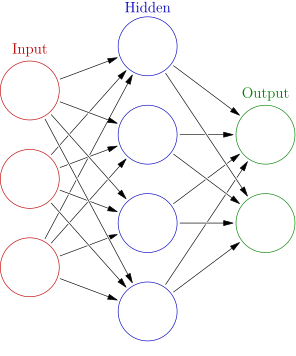

the input features are 77 , and i used  3hidden layers ,each one has 64 neuron with relu activation ,and for an output layer consist of 2 neurons with sigmoid activation.

In [52]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(77,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])



**compiling our model**

as you see we used adam as optimizer, scc as loss and accuracy as metric.

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training the model with training data**

In [54]:
history = model.fit(x_a,y_a, validation_data=(xt_a, yt_a), epochs=10)

Epoch 1/10
4892/4892 [==============================] - 12s 2ms/step - loss: 0.0195 - accuracy: 0.9963 - val_loss: 0.0112 - val_accuracy: 0.9974
Epoch 2/10
4892/4892 [==============================] - 12s 3ms/step - loss: 0.0112 - accuracy: 0.9975 - val_loss: 0.0086 - val_accuracy: 0.9980
Epoch 3/10
4892/4892 [==============================] - 12s 3ms/step - loss: 0.0103 - accuracy: 0.9976 - val_loss: 0.0086 - val_accuracy: 0.9981
Epoch 4/10
4892/4892 [==============================] - 12s 3ms/step - loss: 0.0098 - accuracy: 0.9978 - val_loss: 0.0098 - val_accuracy: 0.9976
Epoch 5/10
4892/4892 [==============================] - 12s 3ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.0076 - val_accuracy: 0.9980
Epoch 6/10
4892/4892 [==============================] - 12s 2ms/step - loss: 0.0086 - accuracy: 0.9981 - val_loss: 0.0073 - val_accuracy: 0.9982
Epoch 7/10
4892/4892 [==============================] - 11s 2ms/step - loss: 0.0118 - accuracy: 0.9983 - val_loss: 0.0067 - val_ac

as you see the accuracy is increasing and the loss is decreasing .

**visualising accuracy**

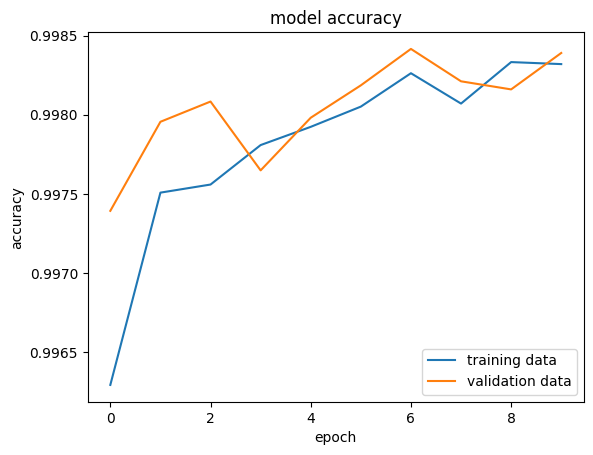

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

**Accuracy of the model on test data**

In [56]:
loss, accuracy = model.evaluate(xt_a, yt_a)
print(accuracy)

1223/1223 [==============================] - 2s 1ms/step - loss: 0.0064 - accuracy: 0.9984
0.9983900785446167


In [57]:
print(xt_a.shape)
print(xt_a[0])

(39133, 77)
[ 0.81484319 -0.37201435 -0.06191329 -0.05765135 -0.10057583 -0.02274662
  0.39435902 -0.451906    0.35949803  1.56437245 -0.2423968  -0.40387186
 -0.30886783 -0.24604126 -0.17731299 -0.28493536 -0.43112591 -0.4417964
 -0.3669069  -0.0287377  -0.36570679 -0.43206454 -0.42040243 -0.35945733
 -0.02601434 -0.25802336 -0.23846393 -0.25270925 -0.25101174 -0.24697004
 -0.2521218   0.          0.          0.          0.03530889  0.02865752
 -0.28065907 -0.06580244 -0.45110957  0.05500052  0.35192787  0.70387034
 -0.00345257  0.         -0.03347434 -0.2521218   0.         -0.47802502
 -0.51116915 -0.34311814  0.         -0.58924491  0.30481707  0.35949803
 -0.30886783  0.          0.          0.          0.          0.
  0.         -0.06191329 -0.10057583 -0.05765135 -0.02274662 -0.36072838
 -0.22344855 -0.1784357   0.12192145 -0.12706457 -0.12232289 -0.15069935
 -0.09600514 -0.29815765 -0.19451033 -0.31276535 -0.27435209]


In [58]:
Y_pred = model.predict(xt_a)

1223/1223 [==============================] - 2s 1ms/step


In [59]:
print(yt_a[0])

1


In [60]:
print(Y_pred.shape)
print(Y_pred[0])

(39133, 2)
[0.01963581 0.99764633]


In [61]:
print(xt_a)

[[ 0.81484319 -0.37201435 -0.06191329 ... -0.19451033 -0.31276535
  -0.27435209]
 [ 0.81484319 -0.37128497 -0.08128543 ... -0.19451033 -0.31276535
  -0.27435209]
 [ 0.81484319 -0.37129298 -0.08128543 ... -0.19451033 -0.31276535
  -0.27435209]
 ...
 [-1.19067365 -0.36977049 -0.07159936 ... -0.19451033 -0.31276535
  -0.27435209]
 [ 0.81484319 -0.36809305 -0.07159936 ... -0.19451033 -0.31276535
  -0.27435209]
 [ 0.81484319  3.50717381 -0.00863992 ...  0.92967347  0.84971202
   0.36629441]]


In [62]:
print(Y_pred)

[[1.9635811e-02 9.9764633e-01]
 [9.9995869e-01 1.9490781e-07]
 [9.9717802e-01 5.9765156e-05]
 ...
 [7.2807449e-01 1.9656480e-05]
 [1.7573571e-04 9.9993056e-01]
 [9.9999994e-01 1.0260755e-08]]


**model.predict() gives the prediction probability of each class for that data point**

In [63]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [64]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 

**Building the predictive system**



In [70]:
input_data = (17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,61333333.33333333,41666.66666666666,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,41666.668,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,2208.0,1472.0,0.0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0)
# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 1):
  print(73*"-")
  print('XXXXXX-WARNNING!-->THIS IS A DDOS ATTACK ,YOU HAVE TO DO SOMETHING-XXXXXX')
  print(73*"-")
  print()
  print("@@@@ Here are the most common techniques to mitigate ddos attacks :@@@@")
  print()
  print("1-Traffic Filtering")
  print("read more about it :https://www.imperva.com/learn/ddos/ddos-mitigation-services/")
  print(73*"-")
  print("2-Web Application Firewalls (WAF)")
  print("read more about it :https://www.peerspot.com/questions/how-does-a-waf-help-to-protect-against-ddos-attacks")
  print(73*"-")
  print("3-BGP Rate Limiting and Filtering")
  print("read more about it :https://bgp.net/ddos-network-protection-service/")
  print(73*"-")
  print("4-Content Delivery Networks (CDN)")
  print("read more about it :https://www.cdnetworks.com/cloud-security-blog/employing-cdn-as-a-ddos-mitigation-can-be-useful/")


else:
  print(63*"-")
  print('#####-ITS A NORMAL TRAFFIC ,DONT WORRY ABOUT IT-#####')
  print(63*"-")

1/1 [==============================] - 0s 38ms/step
[[4.4702811e-05 9.9999964e-01]]
[1]
-------------------------------------------------------------------------
XXXXXX-WARNNING!-->THIS IS A DDOS ATTACK ,YOU HAVE TO DO SOMETHING-XXXXXX
-------------------------------------------------------------------------

@@@@ Here are the most common techniques to mitigate ddos attacks :@@@@

1-Traffic Filtering
read more about it :https://www.imperva.com/learn/ddos/ddos-mitigation-services/
-------------------------------------------------------------------------
2-Web Application Firewalls (WAF)
read more about it :https://www.peerspot.com/questions/how-does-a-waf-help-to-protect-against-ddos-attacks
-------------------------------------------------------------------------
3-BGP Rate Limiting and Filtering
read more about it :https://bgp.net/ddos-network-protection-service/
-------------------------------------------------------------------------
4-Content Delivery Networks (CDN)
read more about

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
